# ESS330_ProjProposals

Cameron McLaughlin (The University)  
Alex Smilor (The University)

# Section 3

## EDA

### Project Libraries

In [ ]:
#Libraries 
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats 1.0.0     ✔ stringr 1.5.1
✔ purrr   1.0.2     ✔ tibble  3.2.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'plotly'

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout

### Clean and Prep Data

In [ ]:
#Clean and Prep
raw_turbidity <- readNWISuv("12046260", "63682", startDate = "2013-09-18", endDate = "2019-12-19", tz = "UTC")

GET:https://nwis.waterservices.usgs.gov/nwis/iv/?site=12046260&format=waterml%2C1.1&ParameterCd=63682&startDT=2013-09-18&endDT=2019-12-19

GET:https://nwis.waterservices.usgs.gov/nwis/iv/?site=12045500&format=waterml%2C1.1&ParameterCd=00060&startDT=2013-09-18&endDT=2019-12-19

Our data is directly imported using the USGS dataRetrieval tool. Our data comes in directly through this tool as a csv, with various non-human readable column names. This code eliminates many of the unnecessary columns such as agency, site number, time zone, etc. Additionally, we have implemented renaming to name the correct parameter columns with their appropriate titles and units, Ultimately, our two dataframe with our two parameters needed to be joined so that we can run initial analyses and visualizations to inspect our complete dataset.

### Initial Vis and EDA

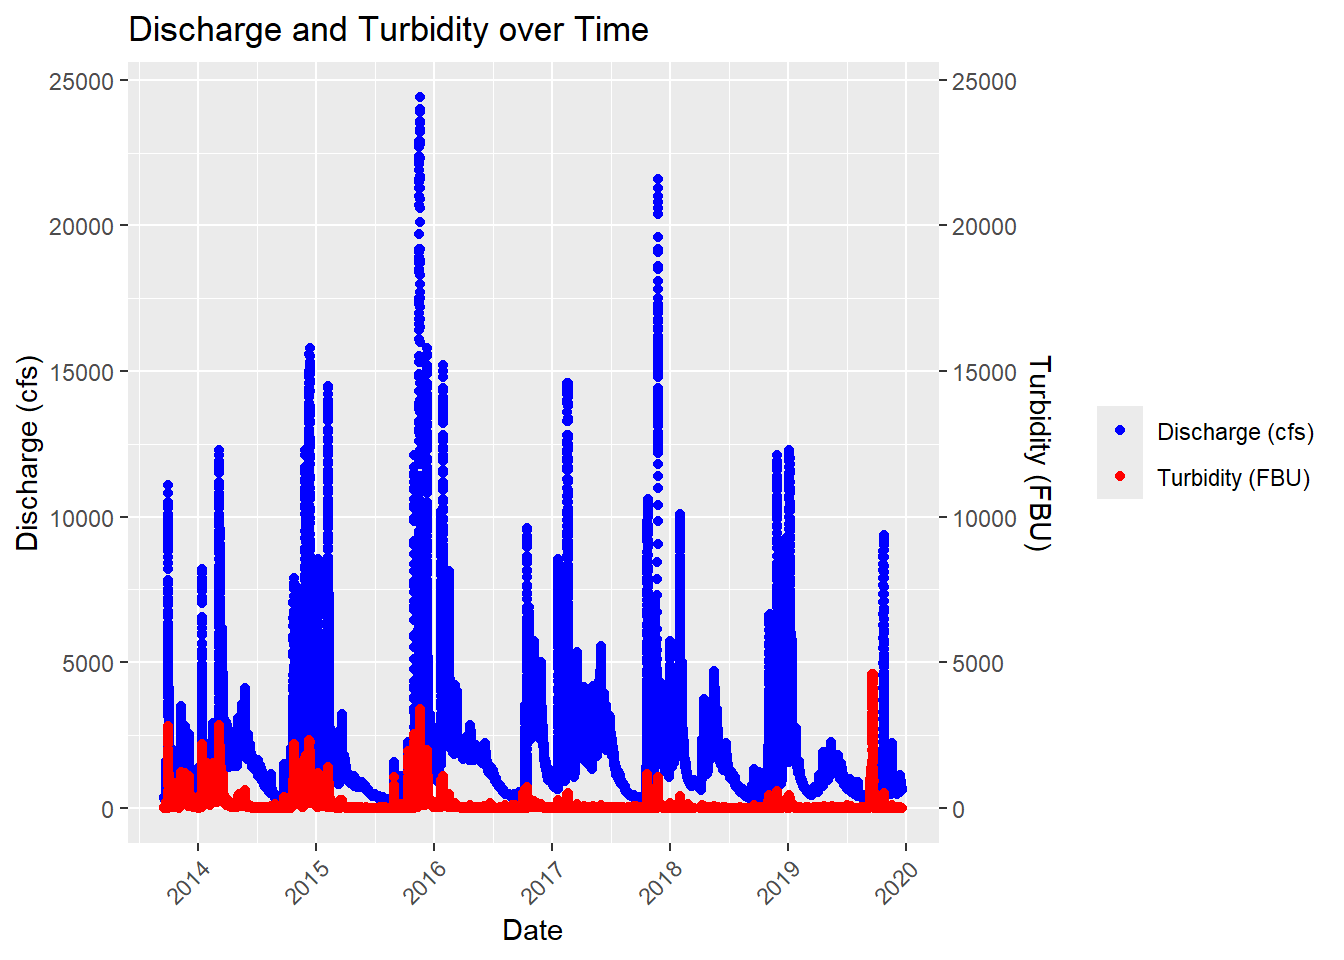

    dateTime                      discharge_cfs   turbidity_fbu    
 Min.   :2013-09-18 08:00:00.00   Min.   :  213   Min.   :   0.00  
 1st Qu.:2015-03-29 22:03:45.00   1st Qu.:  588   1st Qu.:   5.00  
 Median :2016-10-31 04:37:30.00   Median : 1140   Median :  12.30  
 Mean   :2016-11-01 21:18:51.89   Mean   : 1496   Mean   :  88.03  
 3rd Qu.:2018-06-13 18:26:15.00   3rd Qu.: 1930   3rd Qu.:  47.00  
 Max.   :2019-12-19 18:30:00.00   Max.   :24400   Max.   :4590.00  

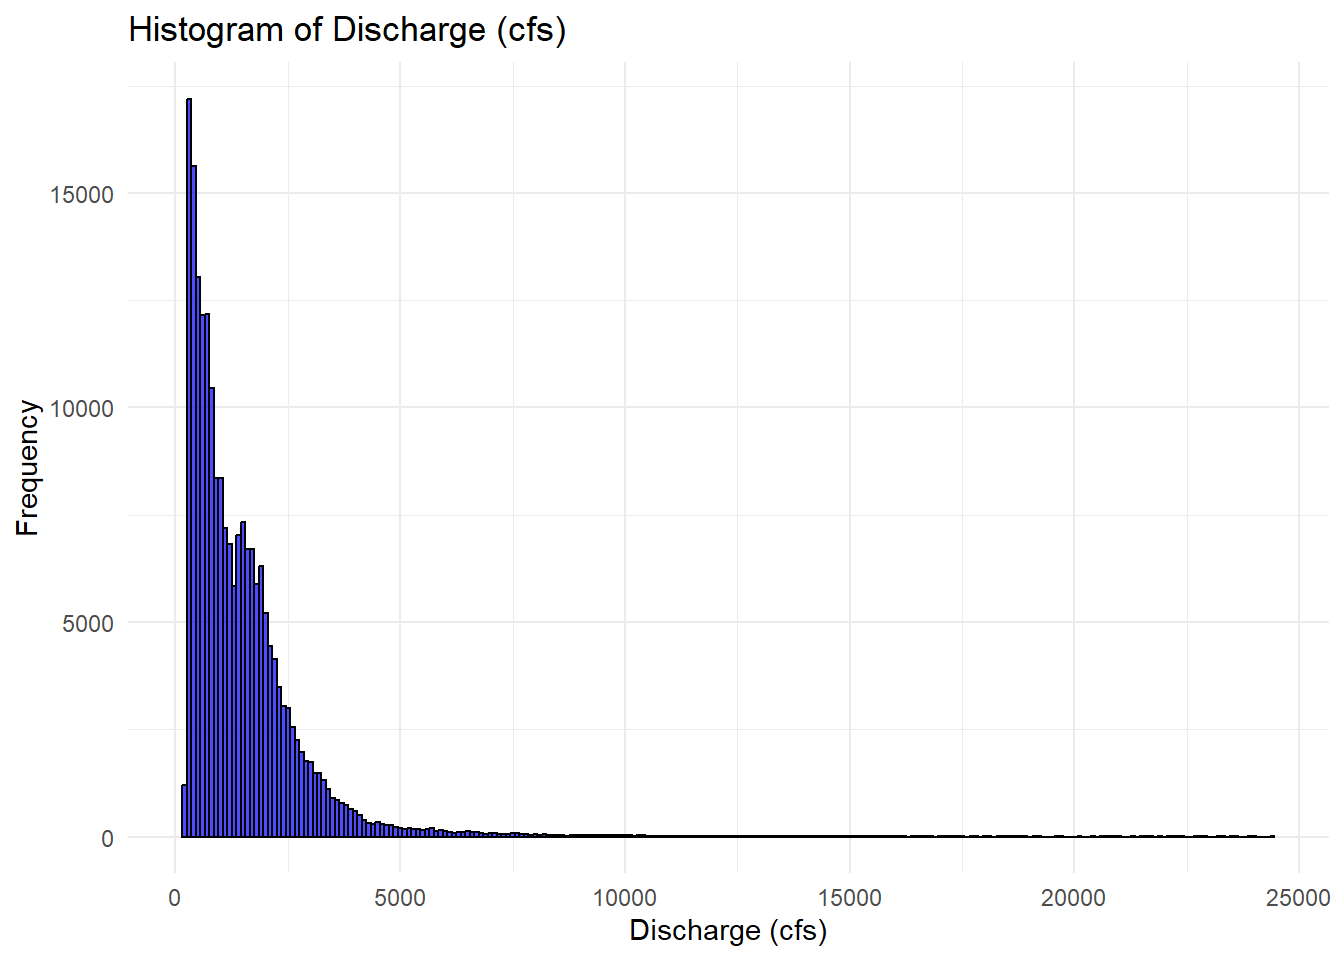

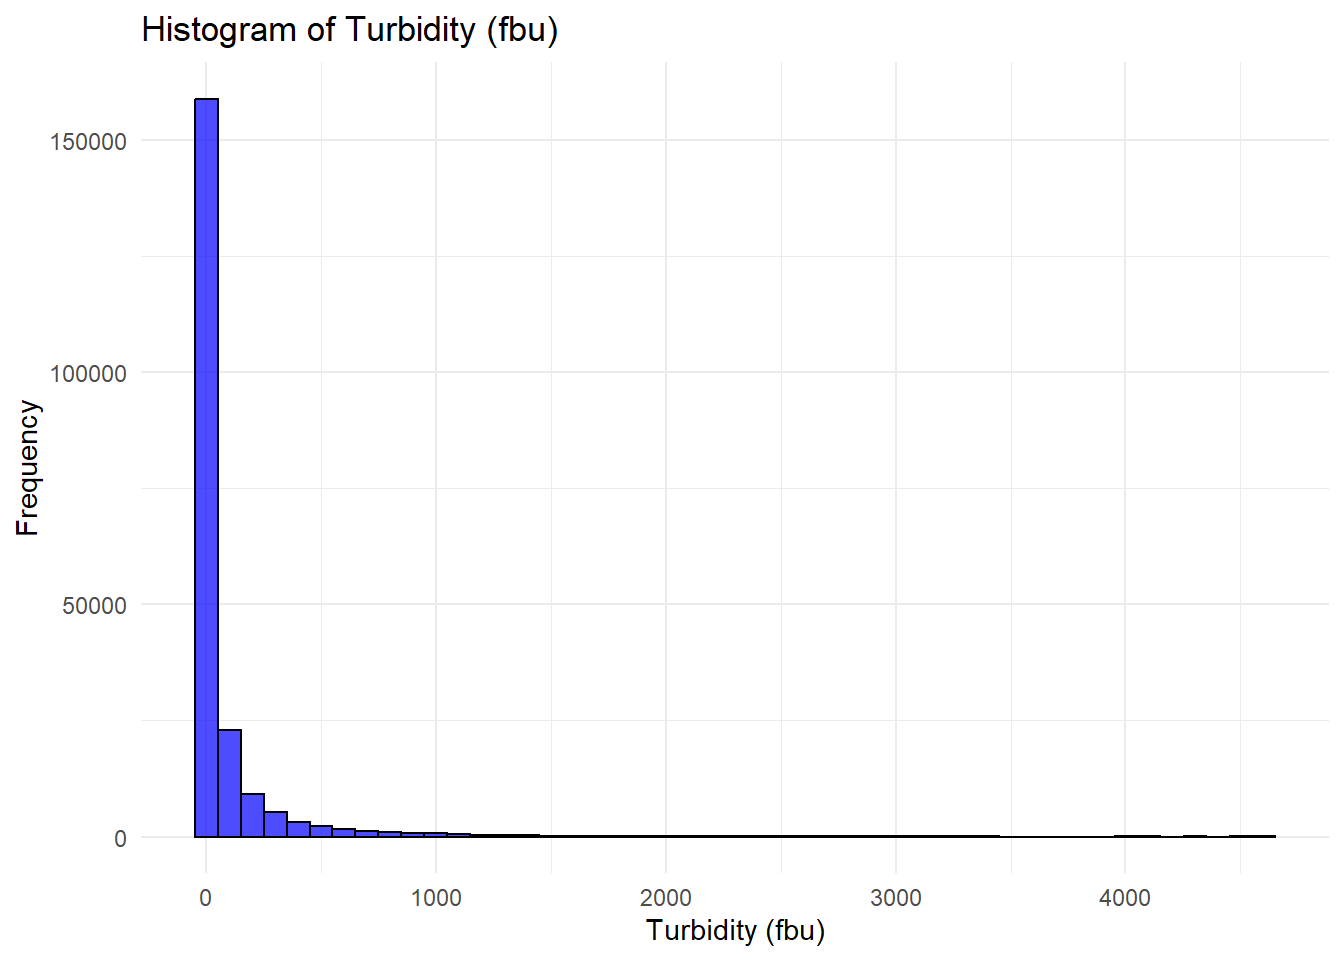

Warning in ks.test.default(joined_data$discharge_cfs, "pnorm", mean =
mean(joined_data$discharge_cfs), : ties should not be present for the
one-sample Kolmogorov-Smirnov test

Warning in ks.test.default(joined_data$turbidity_fbu, "pnorm", mean =
mean(joined_data$turbidity_fbu), : ties should not be present for the
one-sample Kolmogorov-Smirnov test


    Asymptotic one-sample Kolmogorov-Smirnov test

data:  joined_data$discharge_cfs
D = 0.18581, p-value < 2.2e-16
alternative hypothesis: two-sided


    Asymptotic one-sample Kolmogorov-Smirnov test

data:  joined_data$turbidity_fbu
D = 0.36381, p-value < 2.2e-16
alternative hypothesis: two-sided

In [ ]:
#Both Parameters Plotted, discharge Y-left, Turbidity Y-right
plot1 <- ggplot(joined_data, aes(x = dateTime)) +
  geom_point(aes(y = discharge_cfs, color = "Discharge (cfs)")) +
  geom_point(aes(y = turbidity_fbu, color = "Turbidity (FBU)")) +scale_y_continuous(name = "Discharge (cfs)", sec.axis = sec_axis(~ ., name = "Turbidity (FBU)")) + scale_x_datetime(date_labels = "%Y", date_breaks = "1 year") +
  labs(title = "Discharge and Turbidity over Time", x = "Date") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_color_manual(values = c("Discharge (cfs)" = "blue", "Turbidity (FBU)" = "red")) +
  theme(legend.title=element_blank())

print(plot1)

For our initial visualizations, we have plotted both parameters (discharge and turbidity) on the same plot, allowing us to visually interpret our data, and initially analyze whether there is correlation between our streamflow (Q) and turbidity levels. Additionally, in order to visually assess the distribution of our data, we made histograms which demonstrated very strong right skewing in both parameters, indicating that we should test for normality and likely keep the normality of our data in mind for future analyses. Our Kolmogorov test was a solution we found to our dataset being very large, resulting in needing this test to determine if our data was normal. Our results indicating the strong right skew (non-normal) we expected from our previous plots (p values \< 2.2e-16).

## Stat Test

##r_sq \<- summary(lm_discharge)\$r.squared \## print(r_sq)

In [ ]:
#perform spearmans rank corr test
spearman_corr <- cor.test(joined_data$discharge_cfs, joined_data$turbidity_fbu, method = "spearman")

Warning in cor.test.default(joined_data$discharge_cfs,
joined_data$turbidity_fbu, : Cannot compute exact p-value with ties


    Spearman's rank correlation rho

data:  joined_data$discharge_cfs and joined_data$turbidity_fbu
S = 6.1836e+14, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.5981768 

[1] "r squared"


Call:
lm(formula = discharge_cfs ~ turbidity_fbu, data = joined_data)

Coefficients:
  (Intercept)  turbidity_fbu  
     1279.873          2.451  

For our final investigations into our data, we have ran initial tests for correlation via Spearman’s (non-normal dist. assumed) and a linear regression as well. Our results indicated that there is certainly correlation between our two parameters, but that the relationship is not linear.

# Section 4

## Prelim Methods

1.) Identify your preliminary methods Our preliminary methods, as seen above, are EDA and then initial tests of Spearman’s Correlation and Linear Regression in order to initially determine if there is a relationship between our two parameters. Further into our work we will be looking to integrate time into our perspectives and analyses, which will allow us to better understand how closely related our two parameters are as well as how closely they are linked on a temporal scale. One of our ideas for investigating this would be to test how time as affected turbidity after the dam removal, which would allow us to better visualize and understand how sediments are being transported from the reservoir downstream, and how this process is changing as time moves on after the removal.

2.) What are you thinking about using to analyze your data to answer your question? We are still working on determining our statistical methods but we are certain one of our next steps in analysis should be to determine th relationship of time and turbidity, controlling for discharge. This will allow us to better understand how turbidity continues to change post dam-removal.

3.) Do you have everything you need? What supplemental data might you need? Unfortunately our study is very specific case-wise, so there is no more available data within this watershed relating to the period of the dam removal, but there is a possibility we could integrated parallel data for other dam removals if we were able to find appropriate data.

4.) What are some potential challenges you see in the data? One issue we have found in our data so far is that the period of record for our discharge and turbidity are relatively short on the timescale of the dam removal. Ideally we would have captured turbidity levels before, during, and after the dam removal so that we could additionally analyse geomorphology regime changes but unfortunately this was not possible.

5.) What are some potential challenges you see in the methods? One challenge we have already found when investigating our data initially is that we have pairs in our data that is complicating our Spearman’s rank correlation test. This has caused problems because it complicates the Spearman’s correlation resulting p value into a estimation. In this way, we may need to find a different correlation method to use if this is a big enough issue.

6.) How do the selected methods help you get to your final goal? Ultimately our selected methods allow us to get further by describing and enlightening the relationship between discharge and turbidity levels in the Elwha River specifically below the Glines Canyon Dam Removal site. The analyses and plans we have will allow us to investigate how the relationship works, how it has changed, and how time has impacted this relationship post-dam removal.